In [1]:
import pandas as pd
from hydra import initialize, compose
from pathlib import Path
import json
from ergochemics.draw import draw_reaction
from ergochemics.mapping import operator_map_reaction
from IPython.display import SVG

In [2]:
with initialize(version_base=None, config_path="../configs/filepaths"):
    cfg = compose(config_name="filepaths")

In [3]:
with open(Path(cfg.raw_data) / "sprhea_240310_v3_mapped_no_subunits.json", 'r') as f: 
    krs = json.load(f)

In [4]:
min_rules = pd.read_csv(
    Path(cfg.artifacts) / "rules" / "min_rules.tsv",
    sep="\t",
)
print(f"# rules: {len(min_rules)}")
min_rules.head()

# rules: 1224


,Name,Reactants,SMARTS,Products,Comments
0,rule0001,Any;Any,[#6:1]-[#8:2].[#8:3]>>[#6:1]-[#8:3].[#8:2],Any;Any,A0A060PLD9;A0A0P0YNP7;A0A0P9RZM9;A1XCQ0;A3E242...
1,rule0002,Any;NAD_CoF,[#6:1]-[#8:2].[#6:3]1:[#6:4]:[#6:5]:[#6:6]:[#7...,NADH_CoF;Any,A0A023RBJ1;A0A060KZ16;A0A060TBM3;A0A072UJB3;A0...
2,rule0003,NADH_CoF;Any,[#6:1]1=[#6:2]-[#7:3]-[#6:4]=[#6:5]-[#6:6]-1.[...,Any;NAD_CoF,A0A023RBJ1;A0A060KZ16;A0A060TBM3;A0A072UJB3;A0...
3,rule0004,Any;NADH_CoF;O2,[#6:1].[#6:2]1=[#6:3]-[#7:4]-[#6:5]=[#6:6]-[#6...,Any;NAD_CoF;WATER,A0A1P8W705;A0A250DUW2;A1Z745;A5HMH6;A5HMH7;A5H...
4,rule0005,Any;NAD_CoF;WATER,[#6:1]-[#8:2].[#6:3]1:[#6:4]:[#6:5]:[#6:6]:[#7...,Any;NADH_CoF;O2,A0A1P8W705;A0A250DUW2;A1Z745;A5HMH6;A5HMH7;A5H...


In [5]:
reduced_rules = set(min_rules["SMARTS"])
print(f"# unique templates: {len(reduced_rules)}")

# unique templates: 1032


In [24]:
ct = 0
for k, rxn in krs.items():
    if rxn['min_rule'] and "rule0028" in rxn['min_rule']:
        print(k)
        ct += 1

print(f"Total: {ct}")

59
63
247
274
314
379
420
749
766
787
1399
1427
1820
1885
2389
2974
2999
3060
3351
3360
3708
5456
5515
5982
6054
6348
6630
6748
8705
9547
9617
10855
11323
12645
12751
12848
13509
14405
14486
15268
15515
16573
16839
16945
19589
20211
Total: 46


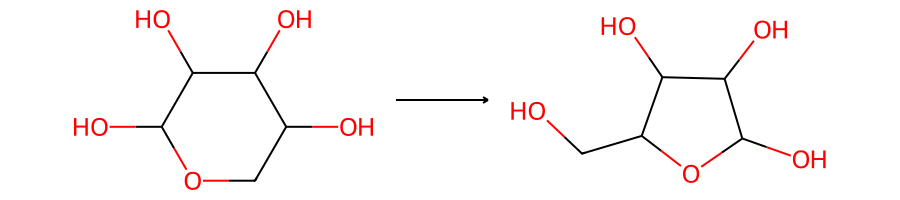

In [8]:
display(SVG(draw_reaction(krs['247']['smarts'])))

In [9]:
print(krs['59']['rhea_ids'])

[15902]


In [10]:
import rdkit
from rdkit import Chem
from rdkit.Chem import rdChemReactions
from rdkit.Chem import AllChem

In [20]:
op28 = min_rules.loc[min_rules["Name"] == "rule0028", "SMARTS"].iloc[0]
op129 = min_rules.loc[min_rules["Name"] == "rule0129", "SMARTS"].iloc[0]
res28 = operator_map_reaction(krs['59']['smarts'], op28)
res129 = operator_map_reaction(krs['59']['smarts'], op129)

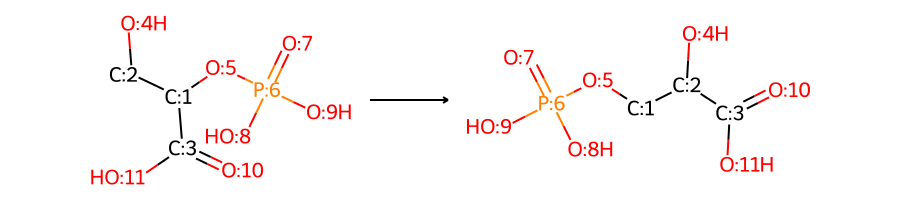

In [21]:
display(SVG(draw_reaction(res28.atom_mapped_smarts)))

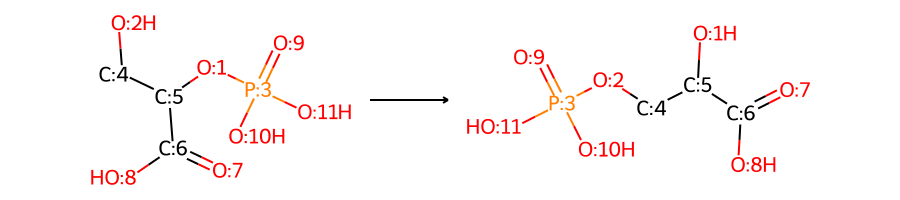

In [22]:
display(SVG(draw_reaction(res129.atom_mapped_smarts)))

([#6:1].[#6:2]-[#6:3])>>([#6:2].[#6:1]-[#6:3])


[11:36:35] Initializing MetalDisconnector
[11:36:35] Running MetalDisconnector
[11:36:35] Initializing Normalizer
[11:36:35] Running Normalizer
[11:36:35] Initializing MetalDisconnector
[11:36:35] Running MetalDisconnector
[11:36:35] Initializing Normalizer
[11:36:35] Running Normalizer


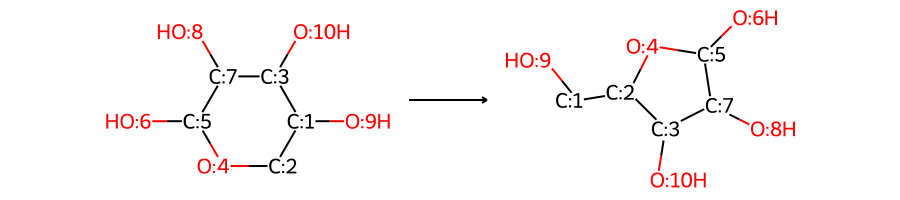

([#8:1].[#6:2]-[#8:3])>>([#8:3].[#6:2]-[#8:1])


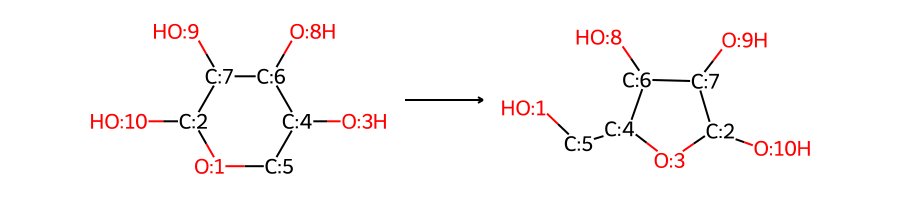

{'([#6:1].[#6:2]-[#6:3])>>([#6:2].[#6:1]-[#6:3])', '([#8:1].[#6:2]-[#8:3])>>([#8:3].[#6:2]-[#8:1])'}


In [28]:
ops_247 = set()
for op in min_rules["SMARTS"]:
    res = operator_map_reaction(krs['247']['smarts'], op)
    if res.did_map:
        print(op)
        display(SVG(draw_reaction(res.atom_mapped_smarts)))
        ops_247.add(op)

print(ops_247)

In [ ]:
rxns_28 = set()
rxns_129 = set()
for k, rxn in krs.items():
    res = operator_map_reaction(rxn['smarts'], op28)
    if res.did_map:
        rxns_28.add(k)
    res = operator_map_reaction(rxn['smarts'], op129)
    if res.did_map:
        rxns_129.add(k)

In [27]:
print(f"# reactions with rule 28: {len(rxns_28)}")
print(f"# reactions with rule 129: {len(rxns_129)}")

# reactions with rule 28: 70
# reactions with rule 129: 16
